In [68]:
# Create Fig 4 panel A in Bonsor et al, 2022
# Read in the origin files to determine the fraction of material in Diameter=30km which originates from D>Pluto = 1,500km, as a function of time



import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

tyear=3.15551e+07
au=1.5e11
msun=2e30
mearth=5.97e24
grav=6.67e-11

from astropy.io import ascii

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style('ticks')
sns.set_context("talk", rc={"lines.linewidth": 3})

import re

# the directory in which the results are stored - this time for a=1au, ecc=0.1 D_max=5,000km..

color_all=['tab:blue','tab:olive', 'tab:orange', 'tab:red', 'tab:purple', 'tab:green']

#########


# change this to the current working directory
working_dir=['/Users/amy/Documents/backup_datadir/projects/collevol/origin_try/abelt_1au_ecc_0.1_m_100_delta_01/test_delta_020/']

dir1=working_dir + 'abelt_1au_ecc_0.1_m_100_delta_01/'








In [69]:
def read_inparam(dir1):
    f = open(dir1+ "inparam.in", "r")

    f.readline() #restart
    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta_t=float(delta_t_all[1])

    line_split=f.readline() #rin
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rin=float(delta_t_all[1])

   
    line_split=f.readline() #rout

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rout=float(delta_t_all[1])

    
    
    line_split=f.readline() #imax

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    imax=float(delta_t_all[1])


    line_split=f.readline() #ecc

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    ecc=float(delta_t_all[1])
    line_split=f.readline() #vrel

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    vrel=float(delta_t_all[1])

    
     # delta

    line_split=f.readline()  # 
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta=float(delta_t_all[1])

    line_split=f.readline()  # alpha
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    alpha=float(delta_t_all[1])


    q=(2+alpha)/3

    print("Q", q)
        
    line_split=f.readline() # mtot0
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    mtot0=float(delta_t_all[1])

   

    line_split=f.readline()  # rho_s
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    rho_s=float(delta_t_all[1])



    
    line_split=f.readline() # dmax
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dmax=float(delta_t_all[1])



    line_split=f.readline() # dbl
    

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dbl=float(delta_t_all[1])


    print(f.readline()) # ntime

    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    outputinterval=float(delta_t_all[1])


    print(f.readline()) # agrain


    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    fv0=float(delta_t_all[1])


    print(f.readline()) # 

    f.close()


    #in_dat = ascii.read('inparam.in')

    
    #; find the number of bins! 

    diam_scrap=dmax
    i=0
    while(diam_scrap > dbl) :
           diam_scrap=(1-delta)**(1./3.)*diam_scrap 
           i=i+1 

    nbin=i-1


    print ( 'nbin', nbin)

    
        
    diam_scrap=dmax
    i=0
    while(diam_scrap > 10) :
           diam_scrap=(1-delta)**(1./3.)*diam_scrap 
           i=i+1 

    norigin=i-1
    print ( 'norigin', norigin)
    
    
    mass_i=np.zeros(nbin)
    diam_i=np.zeros(nbin)


    diam_i[0]=dmax
    mass_i[0]=rho_s*diam_i[0]**3./6.
    for i in range(1, nbin-1):
        mass_i[i]=mass_i[i-1]*(1-delta)
    diam_i=(mass_i*6./rho_s)**(1./3.)

    ntime=100000
    r= au*(rin + rout)/2.
    dr=r/2.

   #in_dat = ascii.read('inparam.in')

    return diam_i, nbin, norigin, delta_t, ecc,mtot0, outputinterval, r, q, rho_s, imax, dr



In [70]:
def calc_qdstar(d):
    a=0.3
    Qa=620
    Qb=5.6e-3
    b=1.5
    qdstar=Qa*d**(-a) + Qb*d**(b)
    return qdstar;

In [71]:
    

def calc_tc(diam, mtot, r, q, ecc, dr):
    tyear=3.15551e+07
    au=1.5e11
    msun=2e30
    mearth=5.97e24
    grav=6.67e-11
    vrel=ecc*((grav*msun)/(r))**0.5
    print('vrel', vrel, ecc, 'mtot', mtot)
    x_c=(2*calc_qdstar(diam)/vrel**2)**(1./3.)
    print('qd', calc_qdstar(diam))
    G=0.2*x_c**(-5/2.)
    tper= 2*np.pi*(r**3./(grav*msun))**0.5
    sigma_tot_fcc = (3*mtot*mearth*G/(4*rho_s*diam))* ((6-3*q)/(3*q-5))
    tc_amy =(tper/tyear) *(r*dr/sigma_tot_fcc )* 2*imax/f_e_I  #### years
    return tc_amy;




In [72]:
def find_file_name_newsims(diam_find, dirlist):

    #### choose your index - let's pick 1cm
    #########
    bin_target=np.where(diam_i > diam_find)
    bin_1cm=bin_target[0][np.size(bin_target)-1]

    k=bin_1cm   
    
    if k <10:
        str_part='000'+str(k)
    elif k <100:
        str_part='00'+str(k)
    elif k <1000:
        str_part='0'+str(k)
  
    
    print(str_part)
    if (k>norigin):
        print ('Error - choose a larger diameter', diam_i[k], diam_i[norigin])

    lines=dirlist[0]+ 'origin' + str_part+'.dat'
    return lines, k

In [73]:
###### finding hte mass in bins larger than d_in for bodies of diameter given by the file lines
def find_mass_d_10_newsims(lines, d_in, k, ntimestep):
    f = open(lines, "r")
    it=0
    ll=0
    im=0
    mass_all=np.zeros(ntimestep)
    timestep=np.zeros(ntimestep)
    ######## one of these lines is the timestep line - at some point, split and save the timestep, so that you can check for 'restarts' where one timestep may be duplicated... 
    line=f.readline()              
    line=f.readline()
    ttt=line.split(":")
    timestep[it]=ttt[1]
    line.split(":")
    print(timestep[it])
    while(line):

        dat=np.zeros(norigin)
        
        for ik in np.arange(0,norigin):
            line=f.readline()
            
            dat[ik]=float(line)
               

        line=f.readline()
       #### print(line)             
        line=f.readline()
      ####  print(line)
        
        ttt=line.split(":")
        
        if len(ttt) >1:
            timestep[it]=ttt[1]
            

                 
        time=float(timestep[it])*delta_t

            
        ll=ll+1
       # max_d=np.where(dat==np.max(dat))
       # max_d1=int(max_d[0])
      ######  print(max_d1)
    ######    print('s', timestep[it],timestep[it]*delta_t/(tyear*calc_tc(d_in, mtot, r, q, vrel)),calc_tc(d_in, mtot, r, q, vrel), np.max(dat), diam_i[max_d], np.sum(dat[0:max_d1])) 
   #######################################

        bin_target=np.where(diam_i > d_in)
        

        bin_target2=bin_target[0][np.size(bin_target)-1]
        

        mass_1000km=0
        
        if k > bin_target2:
            for i in range(0, bin_target2):
                mass_1000km=mass_1000km + float(dat[i])
                
                
            mass_all[it]=mass_1000km

        
        
        im=im+1

        sum=0
        for i in range(0, norigin-1):
            sum=sum + float(dat[i])
        


        it =it +1

    return mass_all



In [74]:

ntime=100000
diam_i, nbin, norigin, delta_t, ecc, mtot, outputinterval, r, q, rho_s, imax, dr= read_inparam(dir1[0])



timestep_plot=1000*np.arange(1,ntime+1)
print(delta_t)
yyy=int(np.log10(outputinterval)*(-1.))
  
#########
timestep_plot_yr=timestep_plot*delta_t/tyear
itime_max_float_arr= timestep_plot

ntimestep=np.size(timestep_plot)
 ##  read in collouts.dat
#########################################################################################
print(timestep_plot_yr, timestep_plot_yr*tyear/delta_t)



Q 1.8333333333333333
ntime	1e8

agrain	0.01	m	grainsize


nbin 331
norigin 176
1000000.0
[3.16905984e+01 6.33811967e+01 9.50717951e+01 ... 3.16899645e+06
 3.16902814e+06 3.16905984e+06] [1.0000e+03 2.0000e+03 3.0000e+03 ... 9.9998e+07 9.9999e+07 1.0000e+08]


Q 1.8333333333333333
ntime	1e8

agrain	0.01	m	grainsize


nbin 331
norigin 176
0069
lines 69 /Users/amy/Documents/backup_datadir/projects/collevol/origin_try/abelt_1au_ecc_0.1_m_100_delta_01/test_delta_020/origin0069.dat
0.0
vrel 2982.169232846006 0.1 mtot 100.0
qd 9276421.982769636
tc 1950550.0607581537 [3.16905984e+01 6.33811967e+01 9.50717951e+01 ... 3.16899645e+06
 3.16902814e+06 3.16905984e+06]
vrel 2982.169232846006 0.1 mtot 100.0
qd 9276421.982769636


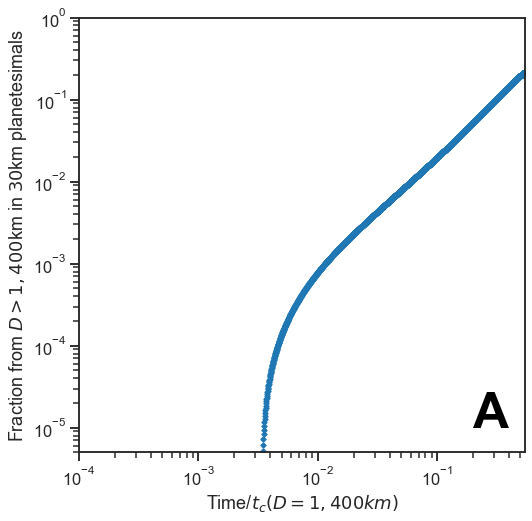

In [90]:
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style('ticks')
sns.set_context("talk", rc={"lines.linewidth": 3})

im=0
ll=0  
it=0
######## we need to open the 'right' file for each particle! 


fig, ax = plt.subplots(figsize=(8, 8))


save_all_time=np.zeros(10000)
save_all_mass=np.zeros(10000)

i=0  
pll=0
   

i=0

diam_i, nbin, norigin, delta_t, ecc, mtot, outputinterval, r, q, rho_s, imax, dr= read_inparam(dir1[0])
f_e_I=ecc

d=1400e3    
lines, k=find_file_name_newsims(d/50, dir1)
print('lines', k, lines)
mass_all=find_mass_d_10_newsims(lines, d, k, ntimestep)
print('tc', calc_tc(d, mtot, r, q, ecc, dr), timestep_plot_yr)
plt.scatter(timestep_plot_yr/calc_tc(d, mtot, r, q, ecc, dr), mass_all,  color=color_all[i], marker='D', s=12)


         
ax.annotate('A', 
             (0.2, 1e-5), # these are the coordinates to position the label
             color='black', size=50, weight='bold') 


ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel('Time/$t_c (D=1,400km)$')
plt.ylabel('Fraction from $D>1,400$km in $30$km planetesimals')

ax.set_ylim((5e-6,1.0))
ax.set_xlim((1e-4, 0.55))


plt.savefig(dir1[0]+"time_origin_justdpluto.pdf")
        
   #######################################
  #######################################


plt.show()

In [88]:
print('tc', calc_tc(d, mtot, r, q, ecc, dr))
with open('bonsor_source_data_fig4a.dat', 'w') as f:
    for i in range(0,np.size(np.where(mass_all>0))):
        print(("{:.4e}".format(timestep_plot_yr[i])), ',', ("{:.4e}".format(mass_all[i])), file=f)


vrel 2982.169232846006 0.1 mtot 100.0
qd 9276421.982769636
tc 1950550.0607581537
